**Prince Amankwah**

**For this part of the project we will be inspecting a Kaggle Titanic Dataset.**

**For a direct link to the dataset: https://www.kaggle.com/c/titanic/data**
**Download the training data from https://www.kaggle.com/c/titanic/data as a CSV file.**

**I decided to analyze a Titanic dataset since its gives us the ability to apply machine learning tools to analyze the passenger information from the training set, and analyze what factors may affect a passenger's chance for survival.**

# Stage I: Data Exploration

Load the training dataset as a Pandas DataFrame. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
titanic_train = pd.read_csv("train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#This dataset contains a total of 891 rows and 12 columns
titanic_train.shape

(891, 12)

In [4]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Stats on numerical columns
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**We notice that the "Age" column contains missing values**

In [6]:
#Stats on categorical columns
titanic_train.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rommetvedt, Mr. Knud Paust",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


**We notice that the "Cabin" column contains missing values**

In [7]:
#Number of passengers that survived(1) vs passengers that did not survive(0)
titanic_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Count')

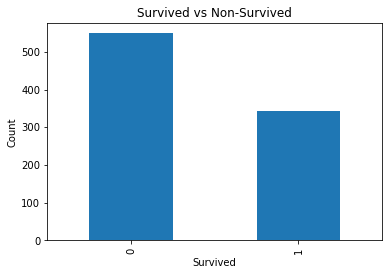

In [8]:
#Bar plot visualization comparing passengers who survived and did not survive
titanic_train["Survived"].value_counts().plot(kind='bar')
plt.title('Survived vs Non-Survived')
plt.xlabel("Survived")
plt.ylabel("Count")

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/App

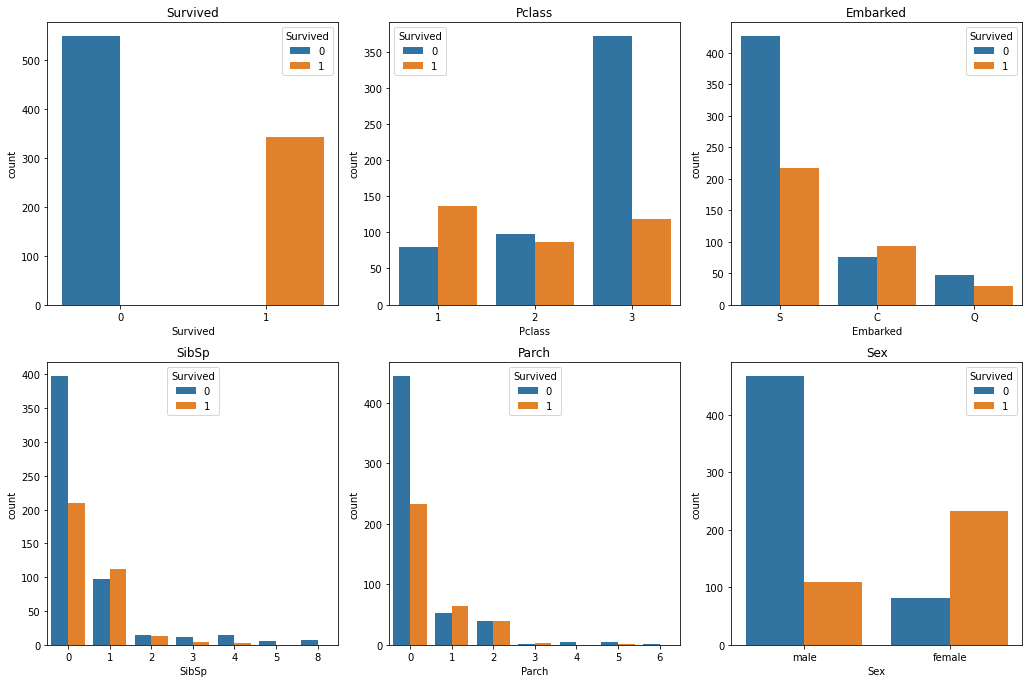

In [9]:
#Create a figure and a set of subplots to show the counts for our columns 
cols = ["Survived", "Pclass", "Embarked", "SibSp", "Parch", "Sex"]

num_rows = 2
num_columns = 3

fig, axs = plt.subplots(num_rows, num_columns, figsize = (num_rows * 7.2, num_columns * 3.2))

for r in range(0, num_rows):
    for c in range(0, num_columns):
        
        i = r * num_columns + c
        ax = axs[r][c]
        sns.countplot(titanic_train[cols[i]], hue=titanic_train["Survived"], ax = ax)
        ax.set_title(cols[i])
                      
plt.tight_layout() 
                                      

**In the data column names, "Survived" refers to passengers who survived(1) and passegers who did not survive(0). The "Pclass" column refers to the type of class the passenger onboarded titanic with, which is indicated by first class(1), second class(2), and third class(3). Our "Fare" refers to the price the passenger paid for the ticket. "SibSp" refers to the amount of siblings/spouse the passengers has. Our "Embarked" refers to the location the passenger embarked from.**

**Our "Pclass" visualization shows that males who were in 3rd class had the least likely hood of surviving**.
**Our "Embarked" visualization shows that males who embarked from S had the least likely hood of surviving**. 
**Our "SibSp" visualization shows that about 400 passengers who did not onboard with a sibling or spouse did not survive**

In [10]:
#Groupby shows that out of all the females 74% survived and out of all the men 18% survived. 
titanic_train.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
#Groupby shows that out of all the Embarked locations, those coming from S had the least likely hood of survival at 33%
#Those traveling from C had a greater chance of survival at 55%
titanic_train.groupby("Embarked")[["Survived"]].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


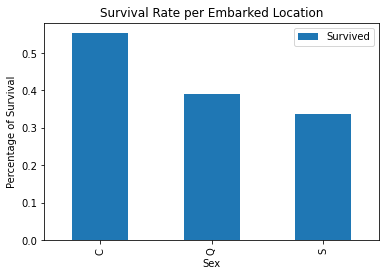

In [12]:
#Visualization of survived passengers from each Embarked location
titanic_train.groupby("Embarked")[["Survived"]].mean().plot(kind='bar')
plt.title("Survival Rate per Embarked Location")
plt.xlabel("Sex")
plt.ylabel("Percentage of Survival")
plt.show()

In [13]:
#Our pivot table shows the survival rate comparing the Sex and Embarked locations. Women traveling from C had the 
#greatest chance of survival at 87% followed by 75% from location Q and 68% from location S.
#Men had the greatest chance of survival from location C at 30%, followed by 7% at location Q, and 17% from 
#location S.
titanic_train.pivot_table("Survived", index = "Sex", columns = "Embarked")

Embarked,C,Q,S
Sex,,,
female,0.876712,0.750000,0.689655
male,0.305263,0.073171,0.174603


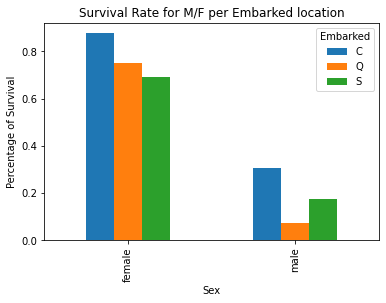

In [14]:
#Visualization of survival rate for male/female from each Embarked location 
titanic_train.pivot_table("Survived", index = "Sex", columns = "Embarked").plot(kind="bar")
plt.title("Survival Rate for M/F per Embarked location")
plt.xlabel("Sex")
plt.ylabel("Percentage of Survival")
plt.show()

In [15]:
#Our pivot table shows the survival rate comparing the Sex and Pclass. Women from 1st class had the 
#greatest chance of survival at 96% followed by 92% from 2nd class and 50% from 3rd class.
#Men had the greatest chance of survival from 1st class at 36%, followed by 15% from 2nd class, and 13% from 
#3rd class.
titanic_train.pivot_table("Survived", index = "Sex", columns = "Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


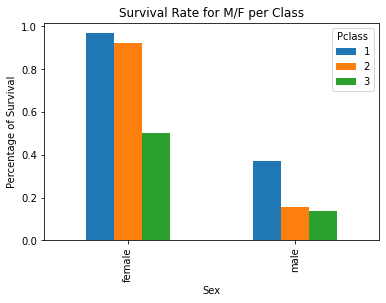

In [16]:
#Visualization of survival rate for male/female from each class
titanic_train.pivot_table("Survived", index = "Sex", columns = "Pclass").plot(kind="bar")
plt.title("Survival Rate for M/F per Class")
plt.xlabel("Sex")
plt.ylabel("Percentage of Survival")
plt.show()

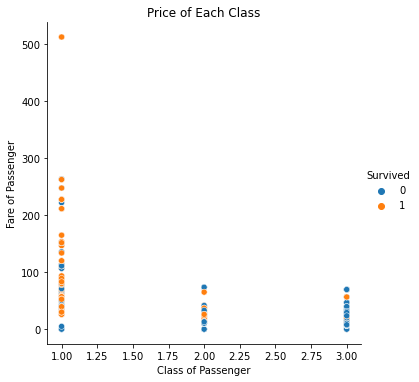

In [17]:
#Scatter plot Visualization of survival for each passenger and their associated class class compared w/ Fare price
#We notice that 1st class passengers contained the most expensive fair price, just over $500
#We also notice that majority of the deaths came from 3rd class passengers indicated by blue circle.
sns.relplot(x ="Pclass", y = "Fare", hue = "Survived", data = titanic_train)
plt.title("Price of Each Class")
plt.xlabel("Class of Passenger")
plt.ylabel("Fare of Passenger")
plt.show()

(3) Data Cleaning

1. Remove all columns with excesive missing values.
2. After Step 1, remove any row that has missing values.

In [18]:
#As we can see we have 3 columns with missing values
titanic_train.isna().values.any(axis=0)

array([False, False, False, False, False,  True, False, False, False,
       False,  True,  True])

In [19]:
#We can see that that Age column contains 177 missing values. 
#We should drop only rows from Age column that are missing
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
#We can see that the Cabin column contains 687 missing values and Embarked column contians 2 missing values.
#We should drop Cabin column since it has a significant amount of missing values 
titanic_train.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rommetvedt, Mr. Knud Paust",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [21]:
#Drop columns with excesive missing values
titanic_train.drop(columns = ["Cabin"], inplace = True)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
#Drop missing rows in Embarked column
missing = titanic_train["Embarked"].isna()
titanic1 = titanic_train[~ missing]
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
#Drop missing rows in Age column
missing2 = titanic1["Age"].isna()
titanic2 = titanic1[~ missing2]
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
#See if we have any missing rows
titanic2.isna().values.any()

False

In [25]:
#Obtain shape of our data after being cleaned
titanic2.shape

(712, 11)